In [170]:
import scipy.io
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [171]:
mat = scipy.io.loadmat('hw2data_2.mat')

In [172]:
x = mat['X']
y = mat['Y']

In [173]:
x.shape

(2000, 1)

In [174]:
#Dimensionality of x is 1 so shape of W1 is (1 X 1)

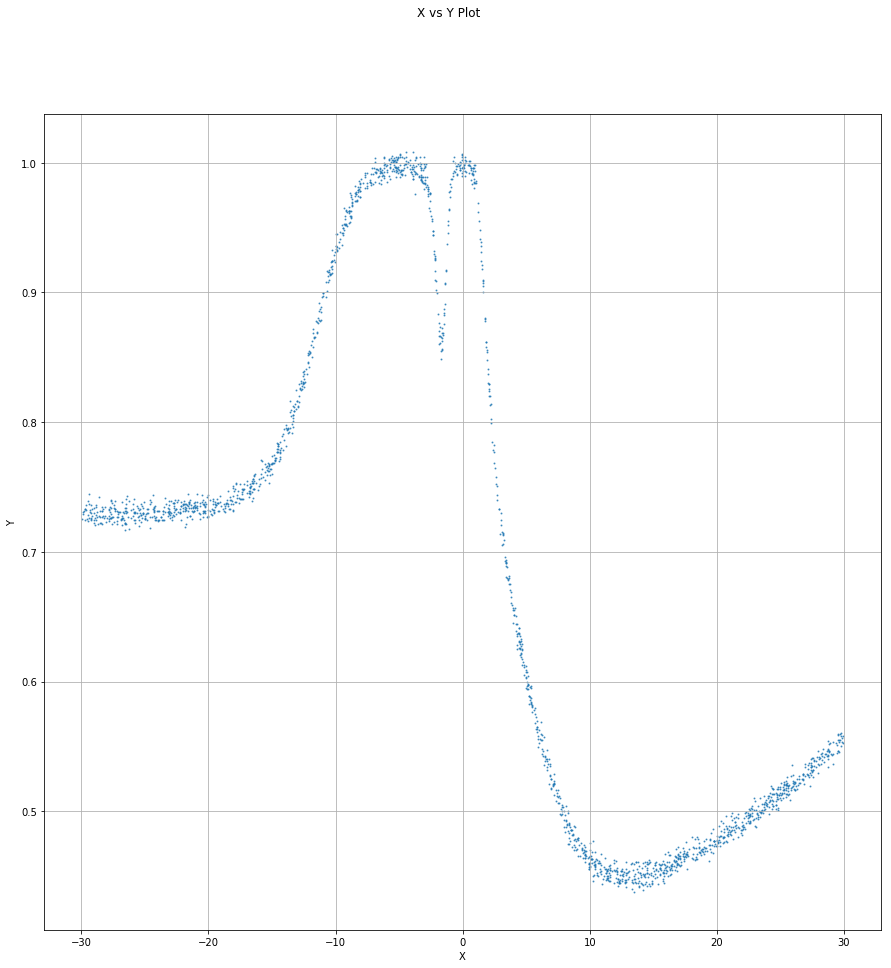

In [175]:
#Vizualizing the x-y distribution
plt.figure(figsize=(15,15))
plt.scatter(x,y,alpha=0.7,s=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(b=True)
plt.suptitle('X vs Y Plot')
plt.show()

In [159]:
n = x.shape[0]
d = x.shape[1]
k = 10

In [160]:
#Initializing the weights and biases

w1 = np.random.randn(k,d)
b1 = np.random.randn(k,1) 
w2 = np.random.randn(k,1)
b2 = np.random.randn(1)


In [161]:
def sigmoid(l):
    s = 1/(1 + np.exp(-l))     
    return s

In [162]:
def relu(l):
    l[l<0] = 0
    return l

In [166]:
def forward_propogation(x,w1,b1,w2,b2):
    #Layer-1 computation
    a = np.dot(x,w1.T) + b1.T
    h = sigmoid(a)    
    #Layer-2 computaion
    y = np.dot(h,w2) + b2.T
    return (y,h,a)


In [167]:
def backward_propogation(x,w1,b1,w2,b2,y,y_nn,eta,h,a,n):
    #print(h.shape)
    del_e_w2 = (1/n)*np.dot(h.T,y_nn-y)
    #print('del_e_w2', del_e_w2)
    del_y_b2 = np.ones((n,1))
    del_e_b2 = (1/n)*np.dot((y_nn-y).T,del_y_b2)
    #print('del_e_b2',del_e_b2)
    #del_e_w1 = (1/n)*np.dot(w2,y_nn.T-y.T,np.dot(h,1-h.T),x)
    del_e_w1 = (1/n)*np.dot(np.dot(np.dot(w2,y_nn.T-y.T),np.dot(h,1-h.T)),x)
    #print('del_e_w1',del_e_w1)
    del_a_b1 = np.ones((n,1))
    #del_e_b1 = (1/n)*np.dot(w2,y_nn.T-y.T,np.dot(h,1-h.T),del_a_b1)
    del_e_b1 = (1/n)*np.dot(np.dot(np.dot(w2,y_nn.T-y.T),np.dot(h,1-h.T)),del_a_b1)
    #print('del_e_b1',del_e_b1)
    
    w2_new = w2 - eta*del_e_w2
    b2_new = b2 - eta*del_e_b2
    #print("b2_new {} b2 {}".format(b2_new, b2))
    w1_new = w1 - eta*del_e_w1
    b1_new = b1 - eta*del_e_b1
    
    return (w2_new,b2_new,w1_new,b1_new)

In [168]:
n = x.shape[0]
d = x.shape[1]
k = 1000

w1 = np.random.randn(k,d)
b1 = np.random.randn(k,1) 
w2 = np.random.randn(k,1)
b2 = np.random.randn(1)

eta = 0.1
error = 100
while(error > 0.1):
    (y_nn,h,a) = forward_propogation(x,w1,b1,w2,b2)
    (w2,b2,w1,b1)= backward_propogation(x,w1,b1,w2,b2,y,y_nn,eta,h,a,n)
    error = ((1/(2*n))*np.dot((y_nn - y).T, (y_nn - y)))[0][0]
    print("error:", error)

(3, 1000)


ValueError: operands could not be broadcast together with shapes (3,1) (2000,1) 

array([[-38.00932971],
       [-38.00932971],
       [ 29.73527657],
       ...,
       [-38.00932971],
       [-38.00932971],
       [ 29.73527657]])